In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titannic = pd.read_csv("train.csv")
titannic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


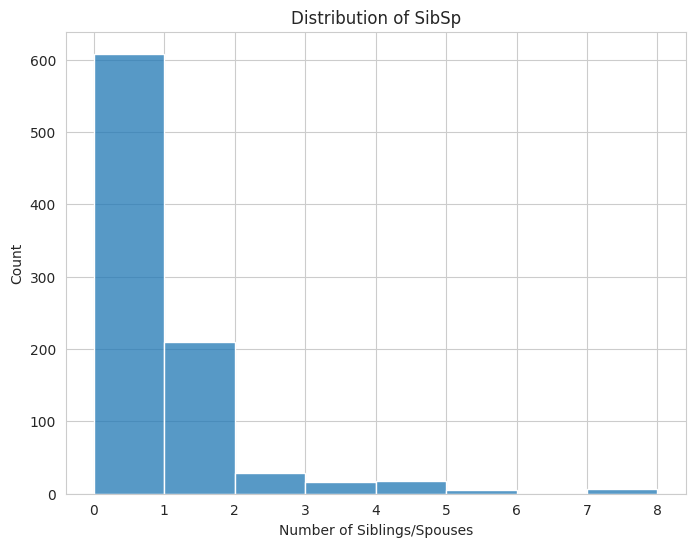

In [3]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.histplot(data=titannic, x='SibSp', bins=range(0, 9), kde=False)
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.title('Distribution of SibSp')
plt.show()

In [4]:
x_train = np.zeros([len(titannic), 8])
y_train = titannic["Survived"]

x_train.shape, y_train.shape

((891, 8), (891,))

In [5]:
a= pd.cut(titannic["SibSp"], bins=3, labels=["0", "1", "2"])
a.values

['0', '0', '0', '0', '0', ..., '0', '0', '0', '0', '0']
Length: 891
Categories (3, object): ['0' < '1' < '2']

In [6]:
# age
x_train[:, 0] = titannic["Age"].fillna(titannic["Age"].median()).astype(float)
# sex
x_train[:, 1] = titannic["Sex"].map({"male" : 0, "female" : 1}).astype(float)
#pclass
x_train[:, 2] = titannic["Pclass"].map({3: 0, 2: 1, 1: 2}).astype(float)
# Fare 
x_train[:, 3] = (titannic["Fare"] - titannic["Fare"].mean()) / titannic["Fare"].std()
# Embarked
x_train[:, 4] = titannic["Embarked"].fillna("S").map({"S": 0, "Q": 1, "C": 2}).astype(float)
# SibSp
x_train[:, 5] = pd.cut(titannic["SibSp"], bins=[-1, 3, 6, 8], labels=[0,1,2])
# Cabin
x_train[:, 6] = titannic['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
# Parch
x_train[:, 7] = titannic['Parch'].apply(lambda x: 1 if x > 0 else 0)

In [7]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
def hypothesis(w, x, b):
    return sigmoid(x.dot(w) + b)
def cost_function(h, y):
    return -np.mean(y * np.log(h + 1e-8) + (1.0 - y) * np.log(1.0 - h + 1e-8))
w = np.random.rand(8)
b = np.random.rand()

In [8]:
epoch = 20000
alpha = 0.01
total_loss = []
for i in range(epoch):
    h = hypothesis(w, x_train, b)
    loss = cost_function(h, y_train)

    for j in range(8):
        w[j] = w[j] - alpha * np.mean((h - y_train) * x_train[:, j])
    b = b - alpha * np.mean((h - y_train))
    total_loss.append(loss)
    print(f"epoch ={i}, loss={loss}")
total_loss = np.array(total_loss)

epoch =0, loss=4.20488039886095
epoch =1, loss=1.0194540339124247
epoch =2, loss=0.748169877785404
epoch =3, loss=0.5545588220390265
epoch =4, loss=0.5509915224052532
epoch =5, loss=0.5490532669177892
epoch =6, loss=0.5484163262696385
epoch =7, loss=0.548089341798373
epoch =8, loss=0.5479176202746041
epoch =9, loss=0.5477955255799526
epoch =10, loss=0.5476944312960047
epoch =11, loss=0.5476008803893959
epoch =12, loss=0.5475103818342911
epoch =13, loss=0.5474210871887544
epoch =14, loss=0.5473323276456046
epoch =15, loss=0.5472438411334357
epoch =16, loss=0.5471555296603089
epoch =17, loss=0.5470673554500322
epoch =18, loss=0.5469793040809121
epoch =19, loss=0.5468913699416683
epoch =20, loss=0.546803550772575
epoch =21, loss=0.5467158456028585
epoch =22, loss=0.5466282539424947
epoch =23, loss=0.5465407754919419
epoch =24, loss=0.5464534100199536
epoch =25, loss=0.5463661573243553
epoch =26, loss=0.5462790172125053
epoch =27, loss=0.5461919894966829
epoch =28, loss=0.5461050739905698


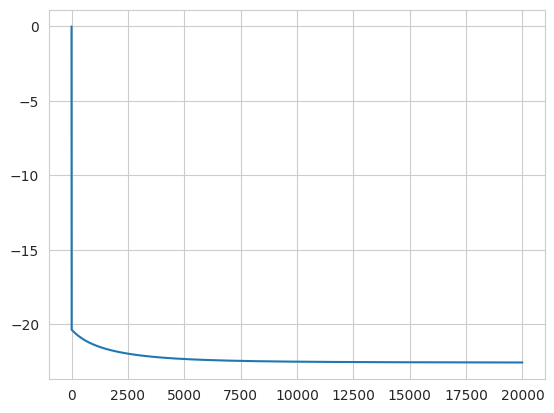

In [9]:
plt.plot(10.0 * np.log(total_loss / (np.max(total_loss + 1e-5))))
plt.show()

In [10]:
titannic_test = pd.read_csv("test.csv")
x_test = np.zeros([len(titannic_test), 8])
x_test.shape

(418, 8)

In [11]:
#数据预处理
# age
x_test[:, 0] = titannic_test["Age"].fillna(titannic_test["Age"].median()).astype(float)
# sex
x_test[:, 1] = titannic_test["Sex"].map({"male" : 0, "female" : 1}).astype(float)
#pclass
x_test[:, 2] = titannic_test["Pclass"].map({3: 0, 2: 1, 1: 2}).astype(float)
# Fare 
x_test[:, 3] = (titannic_test["Fare"] - titannic_test["Fare"].mean()) / titannic_test["Fare"].std()
# Embarked
x_test[:, 4] = titannic_test["Embarked"].fillna("S").map({"S": 0, "Q": 1, "C": 2}).astype(float)
# SibSp
x_test[:, 5] = pd.cut(titannic_test["SibSp"], bins=3, labels=["0", "1", "2"])
# Cabin
x_test[:, 6] = titannic_test['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
# Parch
x_test[:, 7] = titannic_test['Parch'].apply(lambda x: 1 if x > 0 else 0)

In [12]:
z = titannic_test['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
z.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [13]:
y_pred = hypothesis(w, x_test, b)
y_pred = np.round(y_pred)
print(y_pred.shape)

(418,)


In [14]:
submission = pd.DataFrame({
"PassengerId" : titannic_test["PassengerId"].astype(int),
"Survived" : y_pred.astype(int)
})
# 구글 코랩에 대한 파일 경로를 추가하자!
submission.to_csv("/home/miku/Documents/ai/result.csv", index=False)

/tmp/ipykernel_8738/1846573356.py:3: RuntimeWarning: invalid value encountered in cast
  "Survived" : y_pred.astype(int)
